<a href="https://colab.research.google.com/github/Panashe1812/Masters-Project/blob/main/Lime_examples_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import numpy as np
import os, json
from lime import lime_image
from skimage.segmentation import mark_boundaries
import torch
from torchvision import models, transforms
from torch.autograd import Variable
import torch.nn.functional as F

In [ ]:
model = models.vgg16(pretrained=True)
#replace the last linear layer from classifier
last_layer = nn.Linear(4096,7)
model.classifier[6] = last_layer

C:\Users\callmepc\anaconda3\envs\Pytorch\lib\site-packages\torchvision\models\_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
C:\Users\callmepc\anaconda3\envs\Pytorch\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
#path2 ='./vgg16_50_epochs.pth'
path3 = './vgg16_model_29_epoch.pth'
model = (torch.load(path3,map_location=torch.device('cpu')))


In [ ]:
def get_image(path):
    with open(os.path.abspath(path), 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB') 
        


In [ ]:
class_map = {0:'Latino_Hispanic',
             1:'East Asian',
             2:'Indian',
             3:'Middle Eastern',
             4:'Black',
             5:'Southeast Asian',
             6:'White'
             }

In [ ]:
# image paths
path = "./Gradcam vis/test images/"
img_1241 = "1241.jpg"
path_1241= path + img_1241
img_1241= get_image(path_1241)

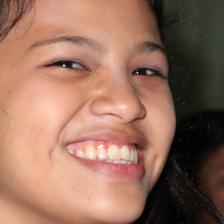

In [ ]:
img_1241

In [ ]:
# image paths
path = "./Gradcam vis/test images/"
img_683 = "683.jpg"
path_683= path + img_683
img_683= get_image(path_683)

In [ ]:
def get_pil_transform(): 
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224)
    ])    

    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])     
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])    

    return transf    

pill_transf = get_pil_transform()
preprocess_transform = get_preprocess_transform()

In [ ]:
 img=  img_1241

In [ ]:
def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    batch = batch.to(device)
    
    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

## Explanation of image 1241.jpg

In [ ]:
test_pred = batch_predict([pill_transf(img_1241)])
class_map[test_pred.squeeze().argmax()]

'Latino_Hispanic'

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation1 = explainer.explain_instance(np.array(img), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=3000) # number of images that will be sent to classification function

  0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
explanation  = Lime_explain(test_pred)

Text(0.5, 1.0, 'Hispanic Class, 1000 samples')

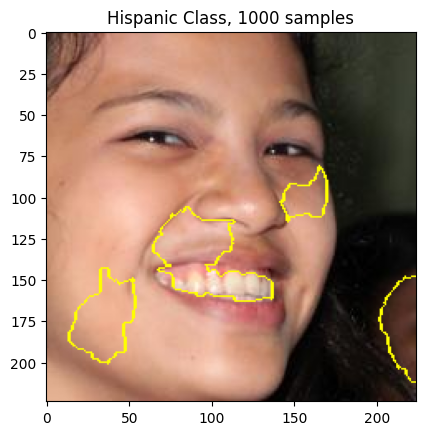

In [ ]:
temp, mask = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)
plt.title('Hispanic Class, 1000 samples')

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation1 = explainer1.explain_instance(np.array(img), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000) # number of images that will be sent to classification function

  0%|          | 0/3000 [00:00<?, ?it/s]

In [ ]:
explanation.top_labels[4]

4

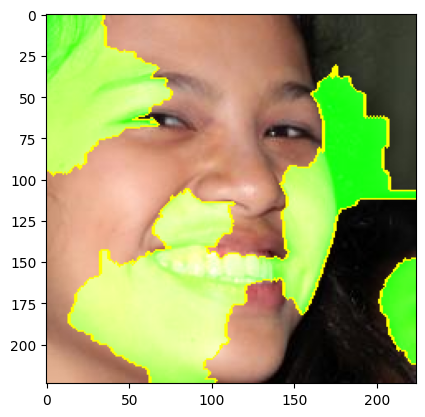

In [ ]:
temp, mask = explanation1.get_image_and_mask(explanation1.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

## Explanation of image 683.jpg

In [ ]:
test_683 = batch_predict([pill_transf(img_683)])
class_map[test_683.squeeze().argmax()]

'Southeast Asian'

In [ ]:
explanation2 = explainer.explain_instance(np.array(img_683), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=1000) # number of images that will be sent to classification function

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
temp, mask = explanation2.get_image_and_mask(explanation2.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)
plt.title('Southeast Asian Class, 1000 samples')

NameError: name 'explanation2' is not defined

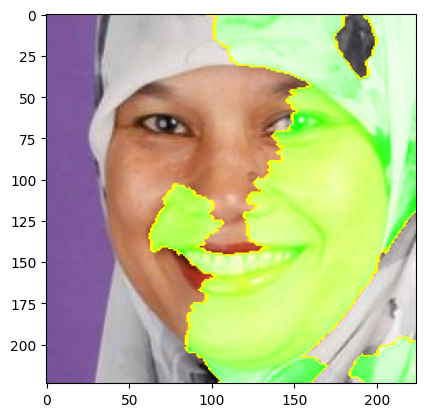

In [ ]:
temp, mask = explanation2.get_image_and_mask(explanation2.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

## Explanation of image 7972

In [ ]:
# image paths
path = "./Gradcam vis/test images/"
img_7972 = "7972.jpg"
path_7972= path + img_7972
img_7972= get_image(path_7972)

In [ ]:
test_7972 = batch_predict([pill_transf(img_7972)])
class_map[test_7972.squeeze().argmax()]

'East Asian'

In [ ]:
explanation3 = explainer.explain_instance(np.array(img_7972), 
                                         batch_predict, # classification function
                                         top_labels=5, 
                                         hide_color=0, 
                                         num_samples=3000) # number of images that will be sent to classification function

  0%|          | 0/3000 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Southeast Asian Class, 3000 samples')

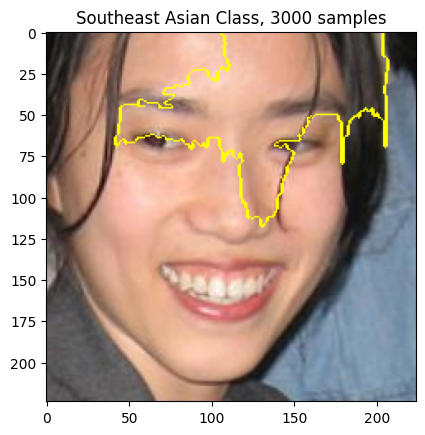

In [ ]:
temp, mask = explanation3.get_image_and_mask(explanation3.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)
plt.title('Southeast Asian Class, 3000 samples')

Text(0.5, 1.0, 'Southeast Asian Class, 3000 samples')

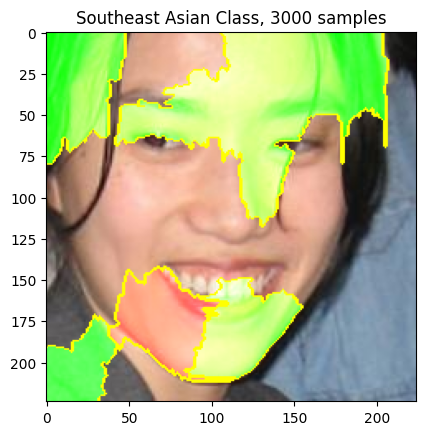

In [ ]:
temp, mask = explanation3.get_image_and_mask(explanation3.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)
plt.title('Southeast Asian Class, 3000 samples')

In [ ]:
test_7972

array([[4.64159336e-11, 9.99975681e-01, 1.02801935e-19, 1.29804206e-19,
        1.88462798e-15, 2.43375798e-05, 2.18317300e-15]], dtype=float32)

In [ ]:
test_7972.squeeze()

array([4.64159336e-11, 9.99975681e-01, 1.02801935e-19, 1.29804206e-19,
       1.88462798e-15, 2.43375798e-05, 2.18317300e-15], dtype=float32)